# Library Yang Dibutuhkan

In [ ]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Mengambil data mnist dari tf.keras

In [ ]:
# Load data
mnist = tf.keras.datasets.mnist

# Load the training and test split of the MNIST dataset
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_shape = training_images.shape
test_shape = test_images.shape

print(f"Terdapat {train_shape[0]} contoh dengan bentuk ({train_shape[1]}, {train_shape[2]}) pada data gambar latih")
print(f"Terdapat {test_shape[0]} contoh dengan bentuk ({test_shape[1]}, {test_shape[2]}) pada data gambar uji")

Terdapat 60000 contoh dengan bentuk (28, 28) pada data gambar latih
Terdapat 10000 contoh dengan bentuk (28, 28) pada data gambar uji


# Data Preprarasion

In [ ]:
# Normalisasi nilai piksel
training_images = training_images / 255
test_images = test_images / 255

# Reshape
training_images = np.reshape(training_images,
                            (training_images.shape[0], 784))
test_images = np.reshape(test_images,
                        (test_images.shape[0], 784))

# Membangun Model

In [ ]:
inputs = Input(shape=(784,))
h_encode = Dense(512, activation='relu')(inputs)
h_encode = Dense(256, activation='relu')(h_encode)
h_encode = Dense(128, activation='relu')(h_encode)
h_encode = Dense(64, activation='relu')(h_encode)

coded = Dense(32, activation='relu')(h_encode)

h_decode = Dense(64, activation='relu')(coded)
h_decode = Dense(128, activation='relu')(h_decode)
h_decode = Dense(256, activation='relu')(h_decode)
h_decode = Dense(512, activation='relu')(h_decode)

outputs = Dense(784, activation='sigmoid')(h_decode)
autoencoder = Model(inputs, outputs)

In [ ]:
autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mse'])
autoencoder.fit(training_images, training_images,
                epochs=10,
                batch_size=100,
                shuffle=True,
                validation_data=(test_images, test_images))

Epoch 1/10
600/600 [==============================] - 17s 11ms/step - loss: 0.0435 - mse: 0.0435 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: 

# Prediksi dan Visualisasi

In [ ]:
predicted = autoencoder.predict(test_images)

313/313 [==============================] - 1s 2ms/step


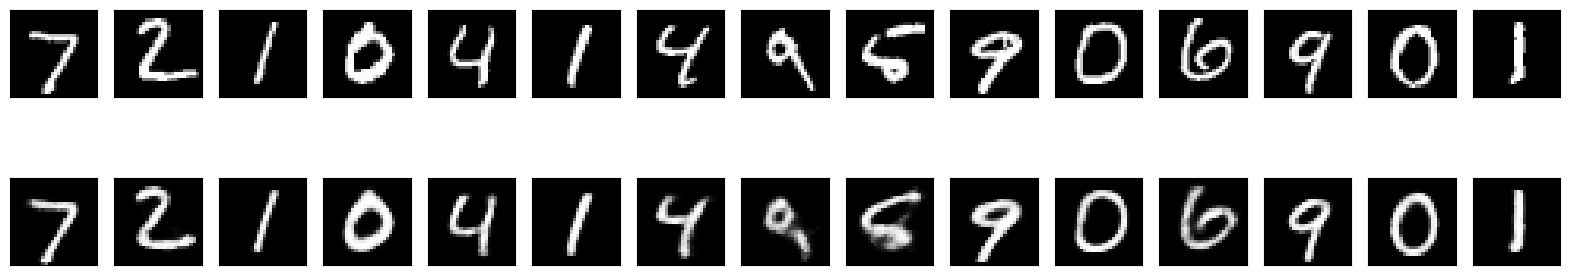

In [ ]:
n = 15
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(predicted[i].reshape(28, 28), cmap='gray')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()